<a href="https://colab.research.google.com/github/yaoyaoustc/googlepython/blob/master/Tensorflow2_salt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# tensorflow 2 training notebook

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [0]:
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [23]:
(x, y), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
trainset = tf.data.Dataset.from_tensor_slices((x,y))

tf.Tensor([6], shape=(1,), dtype=uint8)
tf.Tensor([9], shape=(1,), dtype=uint8)


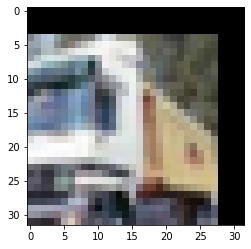

In [46]:
for image, label in trainset.take(2):
  plt.imshow(image)
  print(label)


In [0]:
HEIGHT = 32
WIDTH = 32
NUM_CHANNELS = 3
NUM_CLASSES = 10
NUM_TRAIN_SAMPLES = 50000
def augment(x,y):
  x = tf.image.resize_with_crop_or_pad(x, HEIGHT + 8, WIDTH + 8)
  x = tf.image.random_crop(x, [HEIGHT, WIDTH, NUM_CHANNELS])
  x = tf.image.random_flip_left_right(x)
  return x,y

In [0]:
trainset = trainset.map(augment)

In [0]:
trainset = trainset.shuffle(50000)

In [0]:
def normalization(x,y):
  x = tf.image.per_image_standardization(x)
  return x,y




In [5]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
mnist = tf.keras.datasets.mnist

In [0]:
x_train, x_test = x_train / 255, x_test / 255

In [0]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard

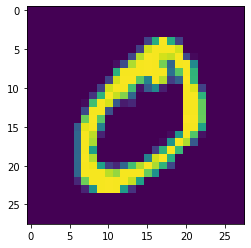

In [21]:
x_train[1].shape

plt.imshow(x_train[1])

In [15]:
tf.summary.image("Training data", img, step=0)

<tf.Tensor: shape=(), dtype=bool, numpy=False>

In [12]:
y_train.reshape(60000,1)

ValueError: ignored

In [0]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])


In [0]:
model.fit(x_train,y_train,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0672 - accuracy: 0.9783
Epoch 2/5
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0591 - accuracy: 0.9809
Epoch 3/5
60000/60000 [==============================] - 6s 103us/sample - loss: 0.0514 - accuracy: 0.9834
Epoch 4/5
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0495 - accuracy: 0.9842
Epoch 5/5
60000/60000 [==============================] - 6s 103us/sample - loss: 0.0442 - accuracy: 0.9849


In [0]:
model.evaluate(x_test,y_test,verbose=2)

10000/1 - 1s - loss: 0.0420 - accuracy: 0.9789


[0.06529630042701029, 0.9789]

In [0]:
y_predict = model.predict(x_test)

In [0]:
y_predict.shape

(10000, 10)

In [0]:
y_predict[0]

array([2.3017890e-09, 2.5126751e-10, 5.3515242e-07, 1.8532309e-04,
       4.9923466e-13, 7.0294064e-08, 1.0286248e-13, 9.9980992e-01,
       3.2222249e-06, 7.7472760e-07], dtype=float32)

In [0]:
np.argmax(y_predict,1).shape

(10000,)

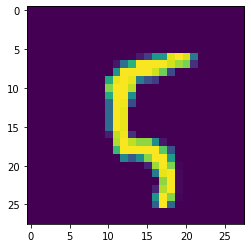

In [0]:
import matplotlib.pyplot as plt

plt.imshow(x_train[100,:,:])

In [0]:
from tensorflow.keras import datasets, layers, models

In [0]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 6s 0us/step


In [0]:
train_images.shape
train_labels.shape

(50000, 1)